In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics, tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv(r"C:\Users\flore\OneDrive\Documents\CSUN\Fall24\COMP_541\Project\VideoGame\games.csv")
#add your own path

In [3]:
df.columns = ['Name','Release date','Estimated Owners','Peak CCU','Required age','Price','Unknown1',
              'Unknown2','About the game','Supported languages','Full audio languages','Reviews','Header Image','Website',
              'Support url','Support email','Windows','Mac', 'Linux','User score','Metacritic url'
              ,'Positive','Negative','Score rank','Achievements','Recommendations','Unknown3','Notes',
              'Average playtime forever','Average playtime two weeks','Median playtime forever','Median playtime two weeks',
              'Developers','Publishers','Categories','Genres','Tags','Screenshots','Movies']

In [4]:
df = df.drop(['Name','Developers','Estimated Owners','About the game','Reviews','Unknown1','Unknown2','Unknown3', 'Supported languages','Full audio languages','Header Image' ,'Website', 'Support url', 'Support email', 'Notes', 'Metacritic url', 'Achievements', 'Screenshots', 'Movies','Publishers','Categories','Tags'], axis=1)

In [5]:
df = df.dropna()

In [6]:
df['Release date'] = df['Release date'].str.extract(r'(\d{4})')

In [7]:
df['Release date'] = pd.to_numeric(df['Release date'], errors='coerce')


In [8]:
df = df[df['Release date'] >= 2013]

In [9]:
df = df[df['User score'] != 0] #remove 'User score == 0 beacuse it could resprent NaN

In [10]:
#Split Genres tags into their own colums with binary value to respresent 

In [11]:
df['Genres'] = df['Genres'].str.split(',')
unique_tags = set(tag for sublist in df['Genres'] for tag in sublist)

In [12]:
print(f'Unique tags: {unique_tags}')

Unique tags: {'Indie', 'Early Access', 'Casual', 'Sports', 'RPG', 'Violent', 'Free to Play', 'Adventure', 'Sexual Content', 'Simulation', 'Racing', 'Strategy', 'Nudity', 'Massively Multiplayer', 'Gore', 'Action'}


In [13]:
one_hot_encoded_genres = df['Genres'].str.join('|').str.get_dummies()

In [14]:
df = pd.concat([df, one_hot_encoded_genres], axis=1)

In [15]:
df.drop('Genres', axis=1, inplace=True) #don't need 'Genres' feature any more

In [20]:
df.shape                    

(3013, 32)

In [21]:
df.head()

,Release date,Peak CCU,Required age,Price,Windows,Mac,Linux,User score,Positive,Negative,...,Indie,Massively Multiplayer,Nudity,RPG,Racing,Sexual Content,Simulation,Sports,Strategy,Violent
1026420,2019,5,0,23.99,True,False,False,62,0,589,...,1,0,0,1,0,0,0,0,0,0
231330,2013,4,0,19.99,True,False,True,53,0,1716,...,0,0,0,0,0,0,0,0,0,0
897820,2018,2,0,3.99,True,True,True,84,0,698,...,1,0,0,1,0,0,0,0,0,0
368080,2016,2,0,14.99,True,False,False,70,0,207,...,1,0,0,1,0,0,0,0,0,0
457140,2019,7507,0,24.99,True,True,True,86,0,82902,...,1,0,0,0,0,0,1,0,0,0


In [22]:
y = df['User score']

In [23]:
X =  df.drop(['User score'], axis=1)

In [24]:
X = pd.DataFrame(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [26]:
rfModel = RandomForestRegressor(max_depth=2, max_features='sqrt', random_state=99)


In [27]:
rfModel.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, max_features='sqrt', random_state=99)

In [28]:
y_pred = rfModel.predict(X_test)

In [29]:
min_value = min(min(y_test), min(y_pred))
max_value = max(max(y_test), max(y_pred))
print(min_value, max_value)

35 97


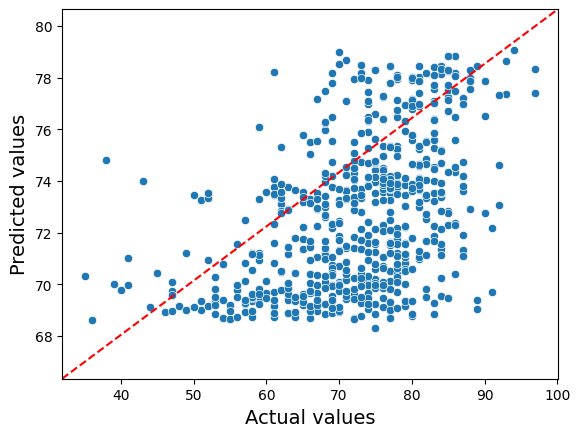

In [30]:
p = sns.scatterplot(x=y_test, y=y_pred)
p.set_xlabel("Actual values", fontsize=14)
p.set_ylabel("Predicted values", fontsize=14)
plt.axline((35, 67), (97, 80), color='r', ls='--')

In [31]:
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))

MSE:  87.83642053828959


[Text(0.5, 0.8333333333333334, 'Release date <= 2019.5\nsquared_error = 104.568\nsamples = 1511\nvalue = 72.353'),
 Text(0.25, 0.5, 'Score rank <= 785.0\nsquared_error = 109.776\nsamples = 1177\nvalue = 71.242'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 108.927\nsamples = 898\nvalue = 69.828'),
 Text(0.375, 0.16666666666666666, 'squared_error = 85.075\nsamples = 279\nvalue = 75.822'),
 Text(0.75, 0.5, 'Price <= 35.49\nsquared_error = 68.552\nsamples = 334\nvalue = 76.118'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 67.319\nsamples = 281\nvalue = 75.325'),
 Text(0.875, 0.16666666666666666, 'squared_error = 53.992\nsamples = 53\nvalue = 80.333')]

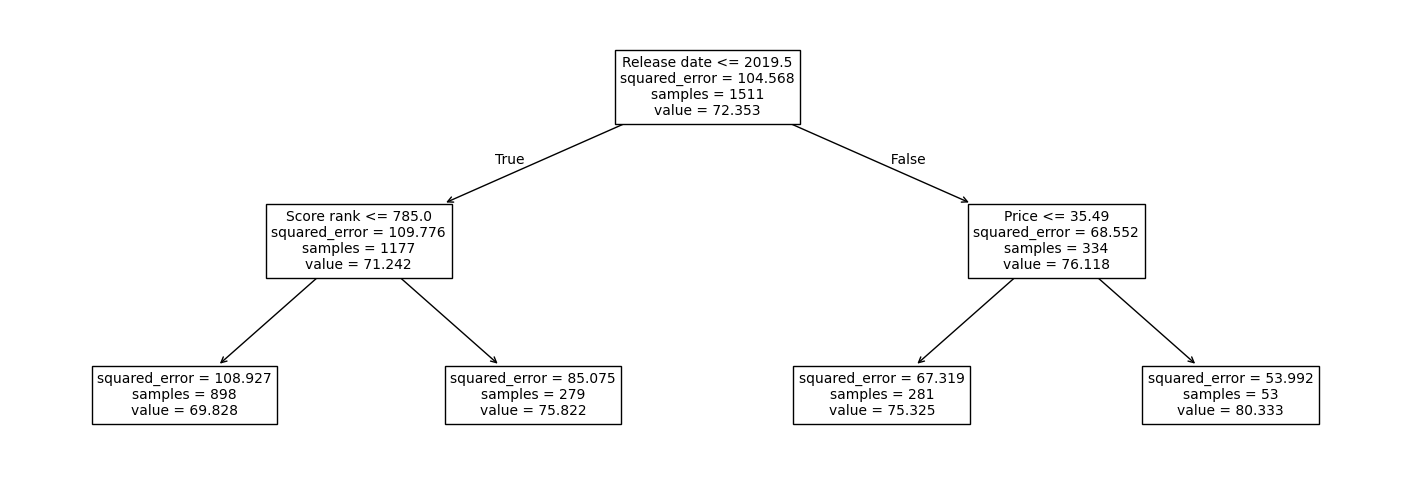

In [32]:
singleTree = rfModel.estimators_[18]

# Set image size
plt.figure(figsize=[18, 6])

# Plot a single regression tree
tree.plot_tree(singleTree, feature_names=X.columns, filled=False, fontsize=10)

In [33]:
y_pred_single = singleTree.predict(X_test)

C:\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [34]:
print("MSE single tree: ", metrics.mean_squared_error(y_test, y_pred_single))

MSE single tree:  98.83213105615651
